# Beta-Binomial model - Bayes' billiard - Estimating a probability

_Adapted from Josep Fortiana (2023-03-13) by Jordi Abante (2024-03-11)_

# A. Experiment and simulation with iid randoom numbers

<h1 style="color:DodgerBlue;"> 00 - Experiment </h1>
<h2 style="color:DodgerBlue;">A one-dimensional pool table, with a position coordinate in $(0,1)$</h2>
<h2 style="color:DodgerBlue;">Generate a position of the cue ball: A <i>prior</i> pdf for $\theta\in(0,1)$.</h2>
<h2 style="color:DodgerBlue;">$n$ observations: independently throw balls $\sim\unifdist(0,1)$.</h2>
<h2 style="color:DodgerBlue;">$\{x=1\}$ means $\{\mskip4mu$ <i>"ball falls to the left of the cue ball"</i> $\mskip4mu\}$.</h2>
<h2 style="color:DodgerBlue;">Result: $n$ observations $x=(x_{1},\dots,x_{n})$ iid$\sim\berndist(\theta)$</h2>

## Run the experiment

$\theta=$ coordinate of the cue ball in the $[0,1]$ interval.

Choose, for instance, $\theta\sim\operatorname{Unif}(0,1)$.

In [36]:
set.seed(24025)

In [37]:
theta<-runif(1)
round(theta,3)

[1] 0.338

We throw a number $n$ of $\textrm{Unif}(0,1)$-distributed balls. For each of them we register whether they fall on the left or on the right of $\theta$

In [38]:
n<-10
z<-runif(n)
round(z,3)

[1] 0.129 0.705 0.252 0.986 0.729 0.213 0.690 0.727 0.606 0.429

In [39]:
y<-(z<theta)
#y
y.num<-1*y # cast the Boolean y to a numeric 0/1 variable
y.num

[1] 1 0 1 0 0 1 0 0 0 0

From a purely theoretical standpoint we do not need to follow step by step Bayes' billiard experiment. Instead of generating $n$ coordinates $z$ in $(0,1)$ and then compare them to the given $\theta$, a numerical vector statistically equivalent to  `y.n` could be obtained as $n$ random $0/1$ numbers $\sim\textrm{Bernoulli}(\theta)\equiv\textrm{Binom}(1,\theta)$.

In [40]:
y.num.1<-rbinom(n,size=1,prob=theta)
y.num.1

[1] 1 1 0 0 1 0 1 1 1 0

For inference we need only the single number  $n_{1}$,  the absolute frequency (number) of 1's in the above sequence (together with the length $n$).

In [41]:
n1<-sum(y)
n1

[1] 3

Which, again, in principle could be generated as a single Binomial random number. Here we are trying to re-live the original experiment.

In [42]:
rbinom(1,size=n,prob=theta)

[1] 3

# 01. Bayesian model - Simulation with i.i.d. random numbers

## Prior $p(\theta)$

### $\theta\sim\textrm{Beta}(a,b)$, 

#### Generalizing the assumption $\textrm{Unif}(0,1)=\textrm{Beta}(1,1)$.

### Set either    

A _"sensible" prior (some historical info),_ or a  _"non-informative"_ prior _(nothing is known in advance)_

#### Here we take $a=2$, $b=5$ (just as an example).

In [43]:
a<-2
b<-5
prior.pdf<-function(theta){dbeta(theta,a,b)}

Let's plot this prior

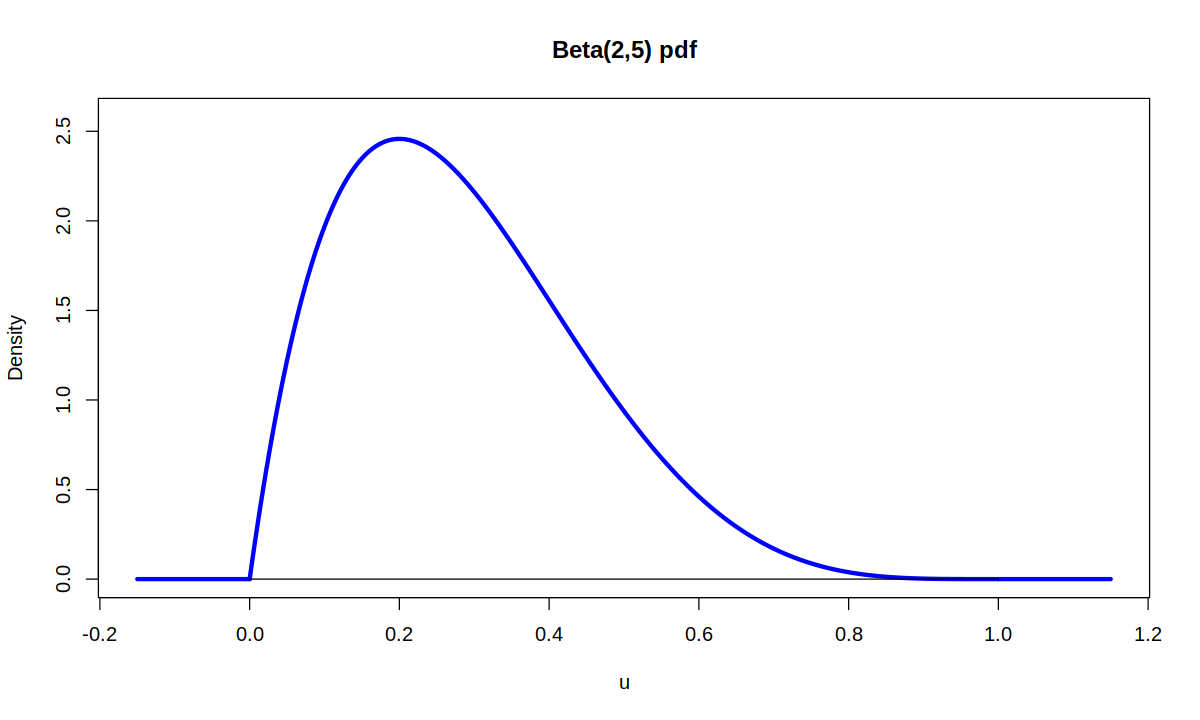

In [44]:
options(repr.plot.width=10,repr.plot.height=6)
u<-seq(0,1,length=1000)
v<-dbeta(u,a,b)
plot(u,v,ylim=c(0,max(v)*1.05),xlim=c(-0.15,1.15),
     ylab="Density",type="l",lwd=3.5,col="blue",main=sprintf("Beta(%d,%d) pdf",a,b))
lines(c(-0.15,0),c(0,0),lwd=3.5,col="blue")
lines(c(1,1.15),c(0,0),lwd=3.5,col="blue")
lines(c(0,1),c(0,0),lwd=1.0,col="black")

### Generate samples from the prior

In [45]:
N<-30000
thetas<-rbeta(N,a,b)
str(thetas)

 num [1:30000] 0.177 0.435 0.392 0.106 0.295 ...


## Prior predictive _a.k.a._ $x$ marginal $p(x)$

For a prior pdf $p(\theta)$ and a likelihood $p(x\mid\theta)$ the $x$-marginal, also called the _prior predictive pmf_ is obtained as the integral of the joint pdf $p(x\,,\,\theta)$ with respect to $\theta$. 

Equivalently, the average of likelihood values, for all possible parameter values, weighted according to their prior probability:

$$
    p(x)=\displaystyle\int_{\Theta}p(x\,,\,\theta)\,d\theta=
    \displaystyle\int_{\Theta}p(x\mid\theta)\cdot p(\theta)\,d\theta
$$

At the samples level this is achieved as follows: 

For each $\theta$ in the prior sample we generate a binomial random number. 

The result is a collection of binomial random numbers, each of which has been generated with a different value of $\theta$. 

The proportion of each $\theta$ values is given by its prior probability.

In [46]:
# Beware of the vectorized syntax: each i-th random number is generated from a different binomial namely the binomial with prob=theta[i]
x<-rbinom(N,size=n,prob=thetas)
str(x)

 int [1:30000] 2 4 7 1 4 1 3 3 4 6 ...


In [47]:
# Table of absolute frequencies
T<-table(x)
T

x
   0    1    2    3    4    5    6    7    8    9   10 
3826 5331 5540 4959 3893 2837 1846 1022  529  172   45 

In [48]:
# Table of relative frequencies (proportions)
f<-T/N
round(f,3)

x
    0     1     2     3     4     5     6     7     8     9    10 
0.128 0.178 0.185 0.165 0.130 0.095 0.062 0.034 0.018 0.006 0.002 

### Compare the sampled simulated prior predictive pmf and the theoretical one

It is known that in a model with Binomial likelihood $X\sim p(x\mid \theta)\sim\binomdist(n\,,\,\theta)$ and Beta prior 
$\theta\sim p(\theta)\sim\textrm{Beta}(a,b)$,    
the prior predictive distribution is a Beta-Binomial,

$$
    \mskip-400mu\betabinomdist(n,a,b)\mskip400mu
$$
(see [Wikipedia](https://en.wikipedia.org/wiki/Beta-binomial_distribution)).

In [49]:
#install.packages("extraDistr",dependencies=TRUE,repos= "https://cloud.r-project.org")
require("extraDistr",quietly=TRUE)

In [50]:
# Beta-Binomial probabilities, to be compared to the above relative frequencies
x.vals<-0:n
g<-dbbinom(x.vals,size=n,alpha=a,beta=b)
round(g,3)

[1] 0.125 0.179 0.185 0.165 0.131 0.094 0.061 0.035 0.017 0.006 0.001

In [51]:
# For a uniform prior both vectors approach the probabilities of a discrete uniform distribution
# For a Beta(a,b) prior the shape of the Beta-Binomial pdf mimicks that of the prior pdf
yfg<-cbind(f,g)
round(t(yfg),3)

,0,1,2,3,4,5,6,7,8,9,10
f,0.128,0.178,0.185,0.165,0.130,0.095,0.062,0.034,0.018,0.006,0.002
g,0.125,0.179,0.185,0.165,0.131,0.094,0.061,0.035,0.017,0.006,0.001


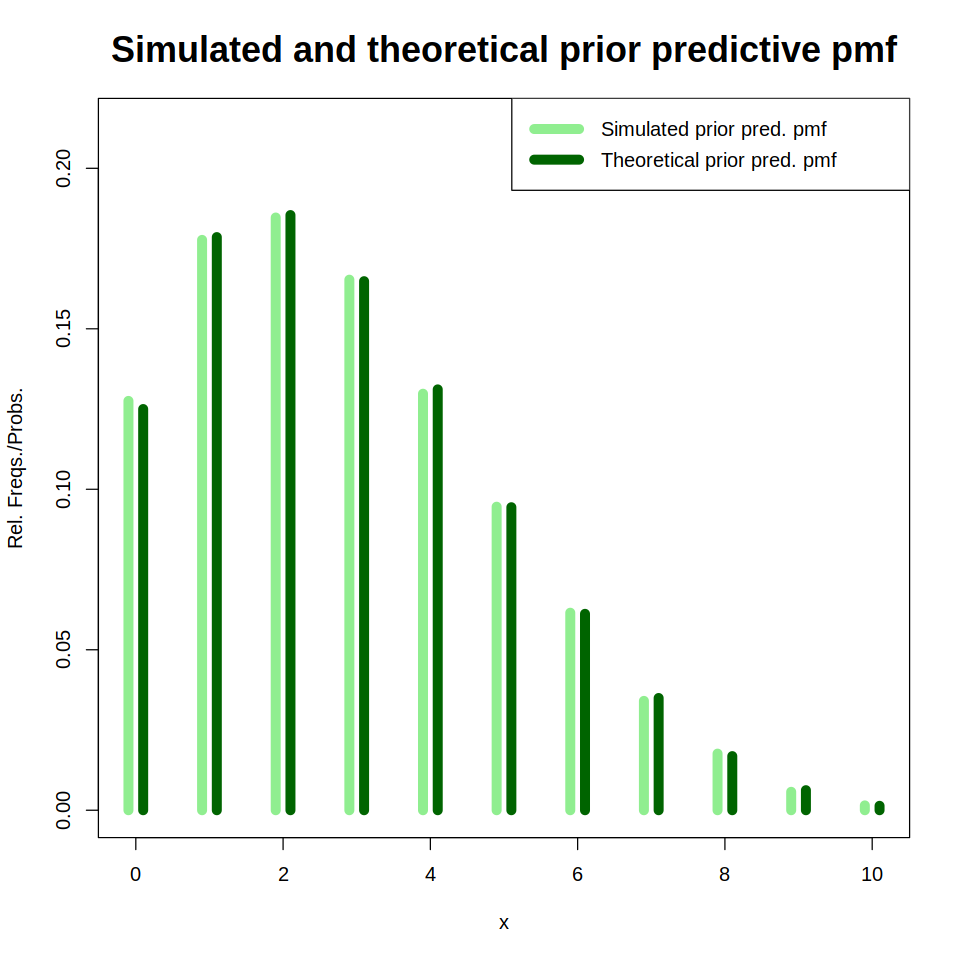

In [52]:
options(repr.plot.width=8,repr.plot.height=8)
y.max<-max(yfg)*1.15
matplot(x=cbind(x.vals-0.1,x.vals+0.1),y=yfg,type="h",lwd=8, lty=1,col=c("LightGreen","DarkGreen"),
        ylim=c(0,y.max),xlab="x",ylab="Rel. Freqs./Probs.",
        main="Simulated and theoretical prior predictive pmf",cex.main=1.8)
legend("topright",legend=c("Simulated prior pred. pmf","Theoretical prior pred. pmf"),
       lwd=8, lty=1,col=c("LightGreen","DarkGreen"))

## Validating the model

As the _prior predictive_ distribution is a weighted average of probabilities for each value of the observed quantity with weights given by the prior pdf, one can use it as a validation of the prior choice.    

The likelihood is the probability of each possible value of $x$ given some value of the parameter $\theta$, when the only knowledge on the parameter is that contained in the prior pdf,
we can compute the resulting pdf of $x$, after averaging on all possible parameter values, each with a weight proportional to its _a priori_ probability. Comparing the actually observed value of $x$ with its probability so obtained we can validate the model: if the observed value is unlikely possibly we should revise the model (prior pdf).

In the present example, the observed datum is `n1=3` which is one of the three values with highest probability according to the prior predictive derived from a $\textrm{Beta}(2,5)$. Thus we can keep this prior as compatible with the observation. This is **not at all** a hypothesis test but just a **cautionary preview of the possible adequacy** of an intended model or otherwise. For instance, repeating the analysis with a $\textrm{Beta}(5,2)$. we find the observed `n1=3` is a rather improbable value with this likelihood and prior.

## Posterior distribution

To condition on the observed data we select, from the list of generated random values of $X$, those corresponding to the actually observed $x_{\text{obs}}$.

In [53]:
x.obs <- 3
x.obs.indexes<-(x==x.obs)
str(x.obs.indexes)

 logi [1:30000] FALSE FALSE FALSE FALSE FALSE FALSE ...


In [54]:
thetas.post<-thetas[x.obs.indexes]
str(thetas.post)

 num [1:4959] 0.151 0.465 0.202 0.346 0.27 ...


The set of $\theta$ samples for these indexes will be approximately distributed following the posterior distribution. The performed selection of samples is the realization of the conditioning operation:

In [55]:
cat(paste(sprintf("From the original N = %d samples,", N),
      sprintf("%d have been selected, corresponding to the observed value x.obs = %d", length(thetas.post),x.obs)))

From the original N = 30000 samples, 4959 have been selected, corresponding to the observed value x.obs = 3

Theoretically, the posterior pdf $p(\theta\,|\,x)$ is obtained from Bayes' formula. We can see how this sample of $\theta|x$ matches the theoretical density $p(\theta|x)$:

$$
    p(\theta\mid x)=\dfrac{p(x\,,\,\theta)}{p(x)}=
    \dfrac{p(x\mid\theta)\cdot p(\theta)}{p(x)}.
$$


From the theory, in a model with Binomial likelihood $X\sim\operatorname{Binomial}(n\mid\theta)$    
with a Beta prior $\theta\sim\operatorname{Beta}(a,b)$,    
when the observed datum is $X=x_{\text{obs}}$    
the posterior distribution is another Beta (this is a conjugate model),
$$
    \textrm{Beta}(a+x_{\text{obs}},b+n-x_{\text{obs}}).
$$

Here we compare the histogram of the $\theta_{\text{post}}\mskip10mu$ sample with the theoretical pdf:

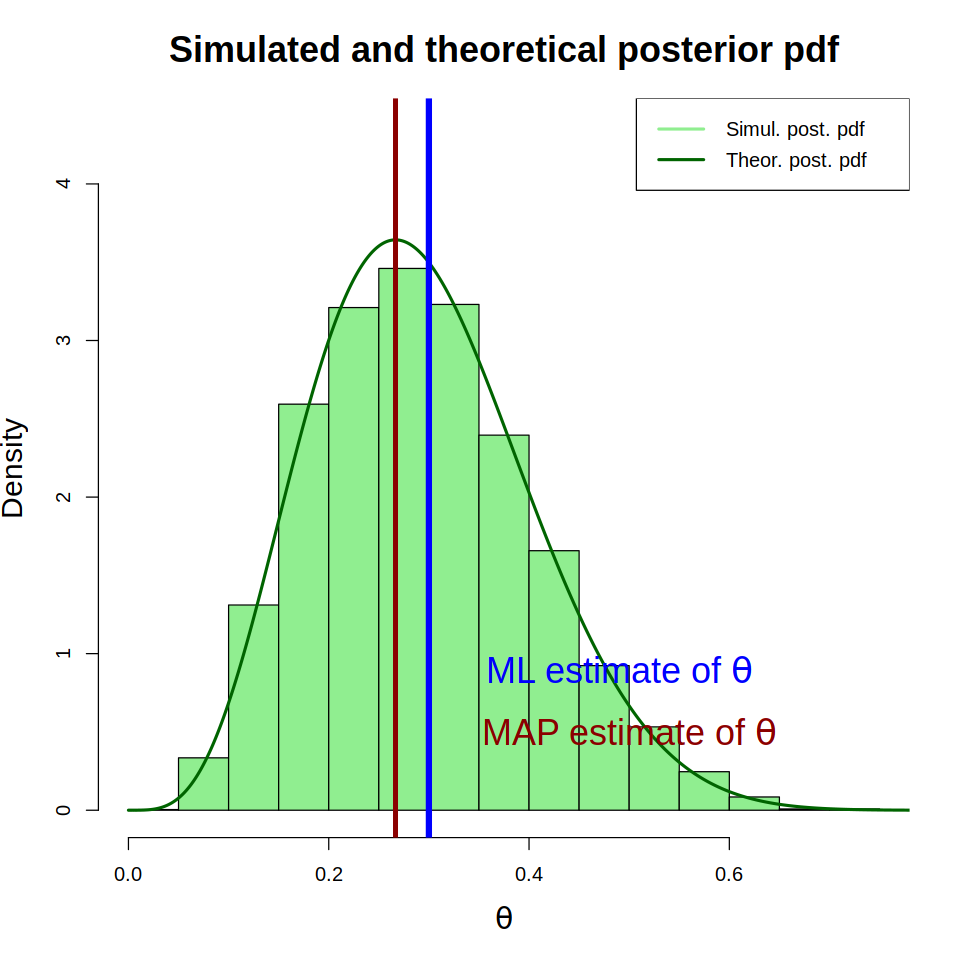

In [56]:
options(repr.plot.width=8,repr.plot.height=8)
u<-seq(0,1,length=1000)
y<-dbeta(u,shape1=a+n1,b+n-n1)
y.max<-max(y)
hist(thetas.post,freq=FALSE,col="LightGreen",xlab=expression(theta),ylim=c(0,y.max*1.2),
     main="Simulated and theoretical posterior pdf",cex.main=1.8,cex.lab=1.5)
lines(u,y,lwd=2.5,col="DarkGreen")
legend("topright",legend=c("Simul. post. pdf","Theor. post. pdf"),
       lwd=2.5,col=c("LightGreen","DarkGreen"))
legx<-ifelse(n1/n<0.5,n1/n+0.1,n1/n-0.1)
abline(v=n1/n,col="Blue",lwd=5)
text(legx+0.09,0.9,expression(paste("ML estimate of ",theta)),col="blue",cex=1.8)
abline(v=(n1+a-1)/(n+a+b-2),col="DarkRed",lwd=4)
text(legx+0.1,0.5,expression(paste("MAP estimate of ",theta)),col="DarkRed",cex=1.8)

### MAP

The maximum a priori estimate is defined as:

$\begin{aligned} 
\hat{\theta}_{\textrm{MAP }}(x) 
& =\underset{\theta}{\arg \max } f(\theta \mid x) \\ 
& =\underset{\theta}{\arg \max } \frac{f(x \mid \theta) g(\theta)}{\int_{\Theta} f(x \mid \vartheta) g(\vartheta) d \vartheta} \\ 
& =\underset{\theta}{\arg \max } f(x \mid \theta) g(\theta) .
\end{aligned}$

This is contrast to the maximum likelihood estimate:

$\hat{\theta}_{\text {MLE }}(x)=\underset{\theta}{\arg \max } f(x \mid \theta)$

## Analysis of posterior quantities

The total posterior information IS the posterior pdf

Any relevant statistical quantities we are interested in we can be extract from it:

### 01 - MAP estimate

By definition, the mode of the posterior distribution. 

For a generic $\textrm{Beta}(\alpha,\beta)$, the mode is:

 
$$
\mskip-600mu
    \begin{array}{ll}
    &\dfrac{\alpha -1}{\alpha+\beta-2},\mskip20mu&\text{for}\mskip8mu\alpha, \beta > 1,\\[0.25cm]
    &\text{Any value in }(0,1),                       &\text{for}\mskip8mu  \alpha, \beta = 1\\[0.25cm]
    &\{0, 1\}\mskip8mu\text{(bimodal)},               &\text{for}\mskip8mu \alpha, \beta < 1\\[0.25cm]
    &0,                                               &\text{for}\mskip8mu \alpha\leq 1, \beta > 1\\[0.25cm]
    &1,                                               &\text{for}\mskip8mu \alpha > 1, \beta ≤ 1.
    \end{array}
$$

In the current case $\operatorname{Beta}(a+x_{\text{obs}},b+n-x_{\text{obs}})$,

$$
\mskip-500mu
    \text{MAP}=\dfrac{a+x_{\text{obs}}-1}{a+x_{\text{obs}}+b+n-x_{\text{obs}}-2}
               =\dfrac{x_{\text{obs}}+a-1}{n+a+b-2}
$$

#### Note

For the uniform prior $a=1$, $b=1$, the MAP estimate of $\theta$ coincides with the frequentist ML estimate.

In [57]:
cat(paste(sprintf("Beta(%d,%d)",a+x.obs,b+n-x.obs),", ",
          sprintf("Theor.MAP = %d/%d = %4.2f",x.obs+a-1,n+a+b-2,(x.obs+a-1)/(n+a+b-2)),sep=""))

Beta(5,12), Theor.MAP = 4/15 = 0.27

For the simulated $\theta_{\text{post}}$ sample:

In [58]:
# See the help for density()
thetas.post.est.dens<-density(thetas.post)
Sim.MAP<-thetas.post.est.dens$x[which.max(thetas.post.est.dens$y)]
cat(sprintf("Sim.MAP = %4.2f", round(Sim.MAP,3)))

Sim.MAP = 0.28

### 02 - Posterior expectation

By definition, the expectation of the posterior distribution. For a generic $Z\sim\operatorname{Beta}(\alpha,\beta)$, the expectation is:

 
$$
    \mskip-600mu
    \operatorname{E}(Z)=\dfrac{\alpha}{\alpha+\beta}.
$$

In the current case $\operatorname{Beta}(a+x_{\text{obs}},b+n-x_{\text{obs}})$,

$$
    \mskip-500mu
    \operatorname{E}(Z)=\dfrac{a+x_{\text{obs}}}{a+x_{\text{obs}}+b+n-x_{\text{obs}}}
               =\dfrac{x_{\text{obs}}+a}{n+a+b}
$$

In [59]:
cat(paste(sprintf("Beta(%d,%d),",a+x.obs,b+n-x.obs)," ",
          sprintf("Theor.Post.Expectation = %d/%d = %4.2f.",x.obs+a,n+a+b,(x.obs+a)/(n+a+b)),sep=""))

Beta(5,12), Theor.Post.Expectation = 5/17 = 0.29.

For the simulated $\theta_{\text{post}}$ sample:

In [60]:
Sim.Post.Expectation<-mean(thetas.post)

In [61]:
cat(paste(sprintf("Beta(%d,%d),",a+x.obs,b+n-x.obs)," ",
          sprintf("Sim.Post.Expectation = %4.3f.",round(Sim.Post.Expectation,3)),sep=""))

Beta(5,12), Sim.Post.Expectation = 0.295.

### 03 - Posterior variance

By definition, the variance of the posterior distribution. For a generic $Z\sim\operatorname{Beta}(\alpha,\beta)$, the variance is:

 
$$
    \mskip-600mu
    \operatorname{var}(Z)=
    \dfrac{\alpha\,\beta}{(\alpha+\beta)^2\,(\alpha+\beta+1)}.
$$

In the current case $\operatorname{Beta}(a+x_{\text{obs}},b+n-x_{\text{obs}})$,

$$
    \mskip-500mu
    \operatorname{var}(Z)=\dfrac{(a+x_{\text{obs}})\,(b+n-x_{\text{obs}})}
    {(a+b+n)^{2}\,(a+b+n+1)}.
$$

Observe that for a large sample size $n$ in the original experiment, assuming that both $x_{\text{obs}}$ and $n-x_{\text{obs}}$ grow following $n$, then the posterior variance diminishes as $1/n$.

In [62]:
cat(paste(sprintf("Beta(%d,%d)",a+x.obs,b+n-x.obs),", ",
          sprintf("Theor.Post.Variance = %d/%d = %7.4f",(x.obs+a)*(b+n-x.obs),(n+a+b)^2*(a+b+n+1),
                round((x.obs+a)*(b+n-x.obs)/((n+a+b)^2*(a+b+n+1)),4)),sep=""))

Beta(5,12), Theor.Post.Variance = 60/5202 =  0.0115

In [63]:
Sim.Post.Variance<-var(thetas.post)

In [64]:
cat(paste(sprintf("Beta(%d,%d)",a+x.obs,b+n-x.obs),", ",
          sprintf("Sim.Post.Variance = %7.4f",round(Sim.Post.Variance,4)),sep=""))

Beta(5,12), Sim.Post.Variance =  0.0120

### 04 - Posterior quartiles and, in general, quantiles

The median (second quartile) is the only quartile with a usable analytical approximation. 

For a generic $Z\sim\textrm{Beta}(\alpha,\beta)$, the median can be approximated by the expression:

$$
    \text{Median}(Z)\approx \dfrac{\alpha-\tfrac{1}{3}}{\alpha+\beta-\tfrac{2}{3}},\mskip18mu\text{for}
    \mskip8mu\alpha,\,\beta>1.
$$

Empirical quartiles and, in general, quantiles can be readily obtained trom the sample:

In [65]:
Sim.Post.Quartiles<-quantile(thetas.post,c(0,0.25,0.50,0.75,1))
round(Sim.Post.Quartiles,4)

0%    25%    50%    75%   100% 
0.0387 0.2133 0.2871 0.3665 0.7119

### 05 - Credible intervals

Remember, in the frequentist framework $\theta$ is a constant, therefore an expression such as:

$$
    \tag{$\star$}
    \operatorname{Prob}\big(a\leq \theta \leq b\big)\geq\gamma
$$

is MEANINGLESS: nothing random there. The frequentist interpretation is, of course, that a large number $n$ of
independent realizations of the experiment should give intervals $(a_{j},b_{j})$, $1\leq j\leq n$, and we expect that a proportion $\geq\gamma$ of them will contain $\theta$ (but, again, this cannot be ascertained).

In the Bayesian framework parameters are random, thus a _credible interval_ (more generally, a _credible region)_ is a sound concept. Statement $(\star)$ has a well-defined meaning in Bayesian statistics. For the billiard problem any interval $(a,b)\subset[0,1]$ satisfying $(\star)$ could be a Credible Interval. 

#### (1)  A reasonable credible interval is the one centered on the MAP estimate, an interval of the form:

$$
    (\textrm{MAP}-t,\textrm{MAP}+t),
$$

where the half-width $t$ is determined by the condition that the proportion of samples in the interval is $\geq\gamma$.

In [66]:
gamma<-0.90
Sim.gamma<-function(t){sum((Sim.MAP-t<=thetas.post)&(thetas.post<=Sim.MAP+t))/length(thetas.post)-gamma}
G.t<-uniroot(Sim.gamma,c(0,0.5)) # here we find t s.t. gamma is 0.9
Sim.t<-G.t$root
round(Sim.t,4)

[1] 0.1775

We should see to it that the interval does not overstep the support boundaries, which is, in principle, possible with this construction (due to the imposed simmetry).

In [67]:
Credible.Interval.01<-c(max(0,Sim.MAP-Sim.t),min(1,Sim.MAP+Sim.t))
cat(sprintf("Credible interval 01 (%5.2f %%): (%6.4f, %6.4f)",gamma*100, 
            round(Credible.Interval.01[1],4),round(Credible.Interval.01[2],4)))

Credible interval 01 (90.00 %): (0.1054, 0.4603)

In [68]:
width.01<-diff(Credible.Interval.01)
round(width.01,4)

[1] 0.3549

#### (2) An easier determination is the interval symmetrically placed in probabilities, leaving out a probability $(1-\gamma)/2$ on both sides.

In [69]:
gamma<-0.90
delta<-(1-gamma)/2
Credible.Interval.02<-as.numeric(quantile(thetas.post,c(delta,1-delta)))
cat(sprintf("Credible interval 02 (%5.2f %%): (%6.4f, %6.4f)",gamma*100, 
            round(Credible.Interval.02[1],4),round(Credible.Interval.02[2],4)))

Credible interval 02 (90.00 %): (0.1309, 0.4938)

In [70]:
width.02<-diff(Credible.Interval.02)
round(width.02,4)

[1] 0.3629

In principle solution (1) would seem better, giving a narrower interval, as it is centered around the peak of the probability density. However we see that, in fact, it is the other way around, solution (2) gives a narrower interval. The reason is that
to find an optimal, minimizing width, interval we should take into account the asymmetry of the pdf.

#### (3) Another possibility is the interval determined by intersecting the empirical pdf with a horizontal line

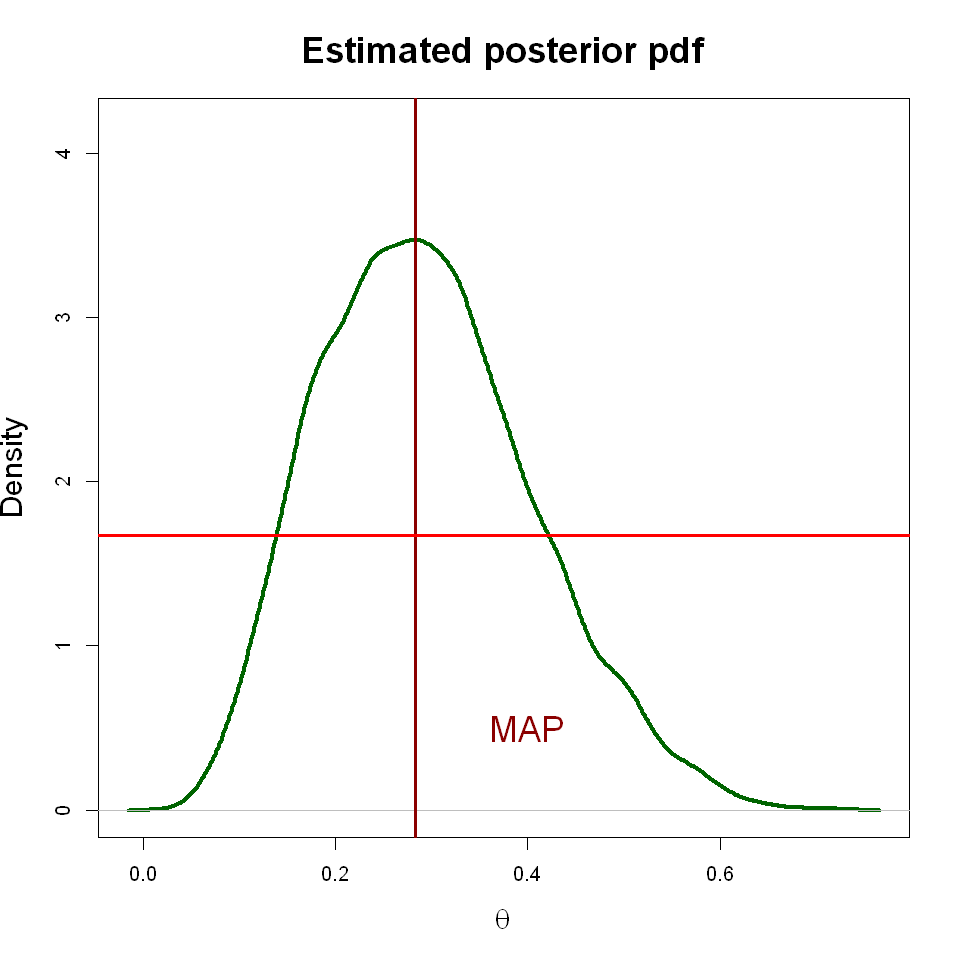

In [41]:
options(repr.plot.width=8,repr.plot.height=8)
u<-seq(0,1,length=1000)
#     col="LightGreen",
thetas.post.est.dens<-density(thetas.post)
Sim.MAP<-thetas.post.est.dens$x[which.max(thetas.post.est.dens$y)]
y.max<-max(thetas.post.est.dens$y)
plot(thetas.post.est.dens,type="l",lwd=3.5,col="DarkGreen",
     xlab=expression(theta),ylim=c(0,y.max*1.2),main="Estimated posterior pdf",cex.main=1.8,cex.lab=1.5)
legx<-ifelse(n1/n<0.5,n1/n+0.1,n1/n-0.1)
abline(v=Sim.MAP,col="DarkRed",lwd=3)
text(legx,0.5,"MAP",col="DarkRed",cex=1.8)
d<-1.8
abline(h=y.max-d,lwd=2.5,col="red")

In [71]:
y.max<-max(thetas.post.est.dens$y)
gamma<-0.90
Sim.gamma.3<-function(s){
    CI.thetas<-(thetas.post.est.dens$x)[which(thetas.post.est.dens$y>=(y.max-s))]
    return(sum((min(CI.thetas)<=thetas.post)&(thetas.post<=max(CI.thetas)))/length(thetas.post)-gamma)
    }
G.s<-uniroot(Sim.gamma.3,c(0,y.max))
Sim.s<-G.s$root
round(Sim.s,4)

[1] 2.4597

In [72]:
CI.thetas<-(thetas.post.est.dens$x)[which(thetas.post.est.dens$y>=Sim.s)]
Credible.Interval.03<-c(min(CI.thetas),max(CI.thetas))
cat(sprintf("Credible interval 03 (%5.2f %%): (%6.4f, %6.4f)",gamma*100, 
            round(Credible.Interval.03[1],4),round(Credible.Interval.03[2],4)))

Credible interval 03 (90.00 %): (0.1697, 0.3715)

In [73]:
width.03<-diff(Credible.Interval.03)
round(width.03,4)

[1] 0.2018